**BrightCon 2022**

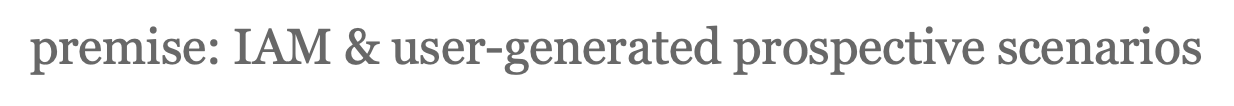

*September, 27<sup>th</sup>, 2022*\
Romain Sacchi

Install `premise`:

    pip install premise
    
`premise` has been intially developed to integrate scenarios from Integrated Assessment Models into LCA databases. However, the need for cover specific sectors and activities yet to be considered by IAM scenarios, led to developing a feature that allows `premise` to integrate user-generated scenario, in addition to the IAM scenario.

The use of user-defined scenarios is available from v. `1.3.0` on.

In [ ]:
from premise import NewDatabase
import brightway2 as bw
bw.projects.set_current("ei_38")

Fetch the external scenario of your choice, by referring to the url of its `datapackage.json` file.
For a list of publicly available scenarios, visit the [community scenarios repository](https://github.com/premise-community-scenarios).

In [ ]:
from datapackage import Package
fp = "https://raw.githubusercontent.com/premise-community-scenarios/cobalt-perspective-2050/main/datapackage.json"
cobalt = Package(fp)

Choose the IAM scenarios to generate `premise` LCA databases from, as well as insert a list of user-defined scenarios to integrated as an `external_scenario` argument when instantiating `NewDatabase`. You can in theory provide several user-defined scenario to integrate at once. In practice, this has not yet been fully tested.

In [ ]:
ndb = NewDatabase(
    scenarios = [
        {"model":"image", "pathway":"SSP2-Base", "year":2040,}, # IAM model IMAGE, scenario "Business As Usual", year 2040
        {"model":"image", "pathway":"SSP2-Base", "year":2050,}, # IAM model IMAGE, scenario "Business As Usual", year 2050
        
    ],
    source_db="ecoinvent cutoff 3.8", # name of the database in your BW2 project
    source_version="3.8",
    key='xxxxxxxxxx', # decryption key. Ask romain.sacchi(at)psi.ch to get it.
    external_scenarios=[
        cobalt, # <-- list datapackages here
    ]
)
ndb.update_electricity()
ndb.update_external_scenario()
ndb.write_superstructure_db_to_brightway("cobalt_w_electricity")

[Documentation](https://premise.readthedocs.io/en/latest/) on `premise`, and [another examples notebook](https://github.com/polca/premise/blob/master/examples/examples.ipynb) are available. For any other matter or question, there is [a discussion group](https://groups.io/g/premise) for that purpose.

URL to a scenario on the future Swiss electricity, gas, diesel, gasoline and hydrogen mixes:
https://github.com/premise-community-scenarios/energy-perspective-2050-switzerland/blob/main/datapackage.json

URL to a scenario on the future supply of cobalt:
https://github.com/premise-community-scenarios/cobalt-perspective-2050/blob/main/datapackage.json

URL to a scenario on the future production of ammonia:
https://github.com/premise-community-scenarios/ammonia-prospective-scenarios/blob/main/datapackage.json